_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [126]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

/bin/sh: wget: command not found


In [127]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

tar: Error opening archive: Failed to open 'instacart_online_grocery_shopping_2017_05_01.tar.gz'


In [128]:
%cd instacart_2017_05_01

[Errno 2] No such file or directory: 'instacart_2017_05_01'
/Users/l/Work/DS2/instacart_2017_05_01


In [129]:
!ls -lh *.csv

-rw-r--r--@ 1 l  staff   2.5K May  2  2017 aisles.csv
-rw-r--r--@ 1 l  staff   270B May  2  2017 departments.csv
-rw-r--r--@ 1 l  staff   551M May  2  2017 order_products__prior.csv
-rw-r--r--@ 1 l  staff    24M May  2  2017 order_products__train.csv
-rw-r--r--@ 1 l  staff   104M May  2  2017 orders.csv
-rw-r--r--@ 1 l  staff   2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [130]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [131]:
!ls -lh *.csv

-rw-r--r--@ 1 l  staff   2.5K May  2  2017 aisles.csv
-rw-r--r--@ 1 l  staff   270B May  2  2017 departments.csv
-rw-r--r--@ 1 l  staff   551M May  2  2017 order_products__prior.csv
-rw-r--r--@ 1 l  staff    24M May  2  2017 order_products__train.csv
-rw-r--r--@ 1 l  staff   104M May  2  2017 orders.csv
-rw-r--r--@ 1 l  staff   2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [132]:
!head aisles.csv

aisle_id,aisle
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation
6,other
7,packaged meat
8,bakery desserts
9,pasta sauce


In [133]:
!wc aisles.csv

     135     311    2603 aisles.csv


In [134]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')
aisles.shape

(134, 2)

In [135]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [136]:
display(example)

Aisles doesn't have any data we need to reproduce the example!

### departments

In [137]:
!head departments.csv

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [138]:
departments = pd.read_csv('departments.csv')
departments.shape

(21, 2)

In [139]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Departments also doesn't have the data we need. Onwards!

### order_products__prior

In [140]:
!ls -lh

total 1406528
-rw-r--r--@ 1 l  staff   2.5K May  2  2017 aisles.csv
-rw-r--r--@ 1 l  staff   270B May  2  2017 departments.csv
-rw-r--r--@ 1 l  staff   551M May  2  2017 order_products__prior.csv
-rw-r--r--@ 1 l  staff    24M May  2  2017 order_products__train.csv
-rw-r--r--@ 1 l  staff   104M May  2  2017 orders.csv
-rw-r--r--@ 1 l  staff   2.1M May  2  2017 products.csv


In [141]:
!head order_products__prior.csv

order_id,product_id,add_to_cart_order,reordered
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1
2,40141,7,1
2,1819,8,1
2,43668,9,0


In [142]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.shape

(32434489, 4)

In [143]:
!free -m

/bin/sh: free: command not found


In [144]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [145]:
order_products__prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [146]:
help(order_products__prior.isna)

Help on method isna in module pandas.core.frame:

isna() method of pandas.core.frame.DataFrame instance
    Detect missing values.
    
    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).
    
    Returns
    -------
    DataFrame
        Mask of bool values for each element in DataFrame that
        indicates whether an element is not an NA value.
    
    See Also
    --------
    DataFrame.isnull : alias of isna
    DataFrame.notna : boolean inverse of isna
    DataFrame.dropna : omit axes labels with missing values
    isna : top-level isna
    
    Examples
    --------
    Show which entries in a DataFrame are NA.
    
    >>> df = pd.DataFrame({'age': [5, 6, np.NaN],
    .

In [147]:
order_products__prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [148]:
dir(order_products__prior)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

In [149]:
help(order_products__prior.groupby)

Help on method groupby in module pandas.core.generic:

groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A label or list of
        labels may be passed to group by the columns in ``self``. Notice
        that a tuple is interpreted a (single) key.
    a

In [150]:
order_products__prior.groupby('order_id')['product_id'].count()

order_id
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
32          9
           ..
3421048     8
3421050    13
3421051    31
3421052     2
3421053     9
3421055    19
3421057     5
3421059     6
3421060    17
3421061    22
3421062     7
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3214874, dtype: int64

In [151]:
order_products__prior.groupby('order_id')['product_id'].count().mean()

10.088883421247614

In [152]:
display(example)

order_products__prior will help us figure our order id and product id columns, but we still need more.

### order_products__train

In [153]:
order_products__train = pd.read_csv('order_products__train.csv')

In [154]:
order_products__train.shape

(1384617, 4)

In [155]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


order_products__train has the same columns as order_products__prior.

### orders

In [156]:
orders = pd.read_csv('orders.csv')

In [157]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [158]:
orders.shape

(3421083, 7)

In [159]:
display(example)

orders data will give us:
- user id
- order number
- order dow/hour of day

order id/product id/cart order are in prior. So at this point, all we're missing is product name!

### products

In [160]:
products = pd.read_csv('products.csv')
products.shape

(49688, 4)

In [161]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


And now we have product name, and the gang is all here! Let's put it together.

## Concatenate order_products__prior and order_products__train

In [162]:
order_products__prior.shape

(32434489, 4)

In [163]:
order_products__train.shape

(1384617, 4)

In [164]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape

(33819106, 4)

In [165]:
assert 1 == 1

In [167]:
#assert 1 == 0

In [168]:
assert len(order_products) == len(order_products__prior) + len(order_products__train)

In [169]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [170]:
order_products['order_id'] == 2539329

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1384587    False
1384588    False
1384589    False
1384590    False
1384591    False
1384592    False
1384593    False
1384594    False
1384595    False
1384596    False
1384597    False
1384598    False
1384599    False
1384600    False
1384601    False
1384602    False
1384603    False
1384604    False
1384605    False
1384606    False
1384607    False
1384608    False
1384609    False
1384610    False
1384611    False
1384612    False
1384613    False
1384614    Fal

In [171]:
condition = order_products['order_id'] == 2539329
order_products[condition]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [172]:
display(example)

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [173]:
orders.shape

(3421083, 7)

In [174]:
orders[orders['user_id'] == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [175]:
orders[orders['user_id'] == 1][orders['order_number'] <= 2]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [176]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)

columns = ['user_id',
           'order_id',
           'order_number',
           'order_dow',
           'order_hour_of_day']

subset = orders.loc[condition, columns]
subset

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [177]:
display(example)

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [178]:
columns = ['order_id', 'add_to_cart_order', 'product_id']

order_products[columns].head()

,order_id,add_to_cart_order,product_id
0,2,1,33120
1,2,2,28985
2,2,3,9327
3,2,4,45918
4,2,5,30035


In [179]:
s1 = {1, 2, 3}
s2 = {2, 3, 4}
# What's in both s1 and s2? 2 and 3
s1.intersection(s2)

{2, 3}

In [180]:
merged = pd.merge(subset, order_products[columns],
                  how='inner', on='order_id')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [181]:
display(example)

In [182]:
subset.shape, order_products.shape, merged.shape

((2, 5), (33819106, 4), (11, 7))

Merge with columns from `products`

In [183]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [184]:
final = pd.merge(merged, products[['product_id', 'product_name']],
                 how='inner', on='product_id')
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [185]:
display(example)

In [186]:
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final.columns = [column.replace('_', ' ') for column in final]
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [187]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [188]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [189]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [190]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [191]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [192]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy.set_index('name')

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

In [193]:
# We can replace values in a dataframe
tidy['trt'].replace('a', 0).replace('b', 1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [194]:
# Can also do this with a mapping dictionary
tidy['trt'].map({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [195]:
# Can also use astype
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [196]:
# Or can use a lambda - overkill here, but useful for flexibility
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [197]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [198]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [199]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [200]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [201]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

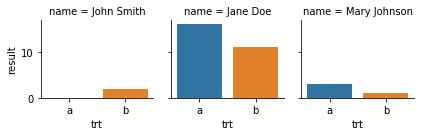

In [202]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [203]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [204]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [205]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [206]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [207]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [208]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [209]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

KeyboardInterrupt: 

In [ ]:
products.shape, order_products.shape, orders.shape, merged.shape

In [ ]:
merged.head()

In [ ]:
# What conditon will filter `merged` to just the 2 products
# that we care about?

# This is equivalent ...

condition = ((merged['product_name']=='Half Baked Frozen Yogurt') |
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

# ... to this:

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]
subset.sample(n=5)

In [ ]:
subset.shape

## 4 ways to reshape and plot

### 1. value_counts

In [ ]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [ ]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

In [ ]:
pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'])

In [ ]:
(pd.crosstab(subset['order_hour_of_day'], 
             subset['product_name'], 
             normalize='columns') * 100).plot();

### 3. Pivot Table

In [ ]:
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len).plot();

### 4. melt

In [ ]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }))

sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

In [ ]:
display(example)

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [2]:
import pandas as pd

In [3]:
aisles = pd.read_csv('instacart_2017_05_01/aisles.csv')
order_products__train = pd.read_csv('instacart_2017_05_01/order_products__train.csv')
order_products__prior = pd.read_csv('instacart_2017_05_01/order_products__prior.csv')
departments = pd.read_csv('instacart_2017_05_01/departments.csv')
products = pd.read_csv('instacart_2017_05_01/products.csv')
orders = pd.read_csv('instacart_2017_05_01/orders.csv')

In [4]:
order_products_total = order_products__prior.append(order_products__train)

assert len(order_products_total) == len(order_products__prior) + len(order_products__train)

# Join Data Section

In [5]:
products.head() #product_id, product_name, aisle_id, department_id
order_products_total.head()#order_id, product_id, add_to_cart_order, reordered

order_products_part = order_products_total[['product_id', 'order_id']]
products_part = products[['product_id', 'product_name']]

final = pd.merge(order_products_part, products_part, on='product_id')

In [6]:
order_products_part = order_products_part.sort_values(by=['order_id', 'product_id'])
final = final.sort_values(by=['order_id', 'product_id'])

In [ ]:
product_names = ['Banana',
                 'Bag of Organic Bananas',
                 'Organic Strawberries',
                 'Organic Baby Spinach',
                 
                ]

condition = merged['product_name'].isin(product_names)


# Reshape Data Section

In [ ]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

In [ ]:
aisles.head() #aisle_id, aisle
orders.head() #order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, day_since_prior order
products.head() #product_id, product_name, aisle_id, department_id
departments.head() #department_id, department
order_products_total.head()#order_id, product_id, add_to_cart_order, reordered

display(example)

In [ ]:
#orders, products, order_products_total.

order_col = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
order_condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2) #'and' does not work
product_col = ['product_id', 'product_name']
order_products_total_col = ['order_id','add_to_cart_order','product_id']

orders_part = orders.loc[order_condition, order_col] #condition, before, columns
products_part = products[product_col]
order_products_total_part = order_products_total[order_products_total_col]

In [ ]:
merge_half = pd.merge(orders_part, order_products_total_part, on='order_id')
merge_final = pd.merge(merge_half, products_part, on='product_id')

In [ ]:
final = merge_final.sort_values(by=['order_number', 'add_to_cart_order'])
final.columns = [column.replace('_', ' ') for column in final] #columns renames, does not reorder.

In [ ]:
display(example)
final

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
##### YOUR CODE HERE #####

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)